# Image Datasets

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torchvision as tv

device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
print(device)

num_workers = os.cpu_count()
print(num_workers)

plt.ion()  # interactive mode

cuda:0
6


In [2]:
root = os.path.join('.', 'dataset_root')
print(f'Path directory: {root}')
batch_size = 128

Path directory: ./dataset_root


In [3]:
def get_mean_std(dataloader, c):
    ''' Computes mean and standard deviation from a dataloader (training set 
    is prefered),
    '''
    assert isinstance(dataloader, DataLoader)
    
    n = torch.zeros(1)
    mean = torch.zeros(c)
    std = torch.zeros(c)

    for bx, _ in dataloader_mnist_train:
        b, c, _, _ = bx.size()  # last batch has fewer images
        n += b
        bx = bx.view(b, c, -1)
        mean += bx.mean(2).sum(0)
        std += bx.std(2).sum(0)
    
    print('# of samples in dataloader', n.item())
    mean = (mean / n).numpy()
    std = (std / n).numpy()
    return mean, std

In [4]:
def imshow(tensor_grid, mean=0., std=1., title=None):
    assert isinstance(tensor_grid, torch.Tensor)
    assert len(tensor_grid.size()) == 4, \
        f'For a batch of images only, {tensor_grid.size()} '
    
    tensor_grid = tv.utils.make_grid(tensor_grid)
    grid = tensor_grid.numpy().transpose((1,2,0))
    grid = std * grid + mean
    grid = np.clip(grid, 0, 1)
    plt.imshow(grid)
    
    if title is not None:
        plt.title(title)
        
    plt.pause(0.001)

## MNIST

- Handwriting digits from 0 to 9
- Input: 28 x 28 grayscale image
- Output: 10 classes from digit 0 to 9
- \# of train samples = 60,000
- \# of test samples = 10,000

In [5]:
mnist_train = tv.datasets.MNIST(
    root=root, 
    train= True,
    download=True,    
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor(),
    ]))

dataloader_mnist_train = DataLoader(
    mnist_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers)

n_train = len(dataloader_mnist_train.dataset)
print(n_train)

60000


In [6]:
mean_mnist, std_mnist = get_mean_std(dataloader_mnist_train, 1)
print(mean_mnist, std_mnist)
print('batch size' , next(iter(dataloader_mnist_train))[0].size())

# of samples in dataloader 60000.0
[0.1306605] [0.30150428]
batch size torch.Size([128, 1, 28, 28])


In [7]:
mnist_train = tv.datasets.MNIST(
    root=root, 
    train=True,
    download=True,    
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor(),
        tv.transforms.Normalize(mean_mnist, std_mnist)
    ]))

dataloader_mnist_train = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers)
    

mnist_test = tv.datasets.MNIST(
    root=root,
    train=False,
    download=True,    
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor(),
        tv.transforms.Normalize(mean_mnist, std_mnist)
    ]))
dataloader_mnist_test = DataLoader(
    mnist_test,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers)

n_train = len(dataloader_mnist_train.dataset)
n_test = len(dataloader_mnist_test.dataset)
print(f'Train = {n_train}, Test = {n_test}')

Train = 60000, Test = 10000


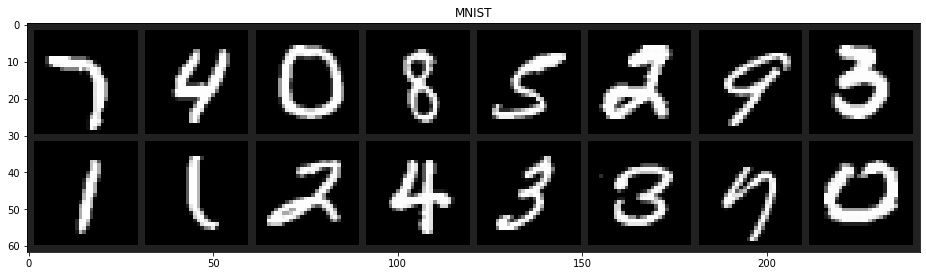

In [8]:
images = next(iter(dataloader_mnist_train))[0]
plt.figure(figsize=[16,8])
# imshow(images[:16], mean=mean, std=std, title='MNIST')
imshow(images[:16], mean=mean_mnist, std=std_mnist, title='MNIST')
plt.show()

## CIFAR10

- A labeled subset of the 80 million tiny images dataset
- Input: 3 X 32 X 32 image
- Output: 10 classes
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship truck
- already normalized
- \# of train samples = 50,000
- \# of test samples = 10,000

https://www.cs.toronto.edu/~kriz/cifar.html

In [9]:
cifar_train = tv.datasets.CIFAR10(
    root,
    train=True,
    download=True,
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor()]))
dataloader_cifar_train = DataLoader(
    cifar_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers)

images, _ = next(iter(dataloader_cifar_train))
print(images[0].size())

mean_cifar, std_cifar = get_mean_std(dataloader_cifar_train, c=3)
print(mean_cifar, std_cifar)

cifar_test = tv.datasets.CIFAR10(
    root,
    train=False,
    download=True,
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor()]))
dataloader_cifar_test = DataLoader(
    cifar_test,
    batch_size,
    shuffle=True,
    num_workers=num_workers)

n_train = len(dataloader_cifar_train.dataset)
n_test = len(dataloader_cifar_test.dataset)
print(f'Train = {n_train}, Test = {n_test}')

classes = np.array(['plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'])
print(f'# of classes {len(classes)}')

Files already downloaded and verified
torch.Size([3, 32, 32])
# of samples in dataloader 60000.0
[-1.03433926e-07 -1.03433926e-07 -1.03433926e-07] [0.99999994 0.99999994 0.99999994]
Files already downloaded and verified
Train = 50000, Test = 10000
# of classes 10


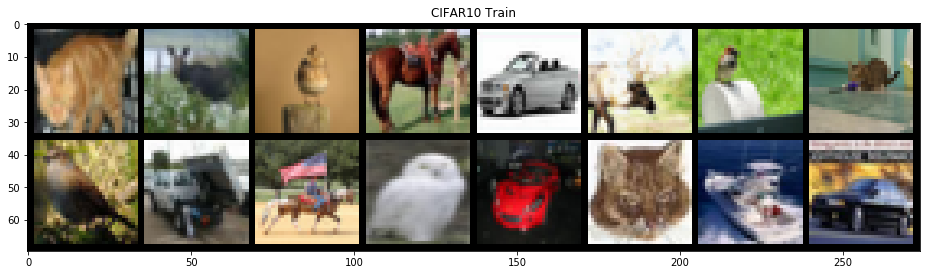

cat, deer, bird, horse, car, deer, bird, cat
bird, truck, horse, bird, car, cat, ship, car


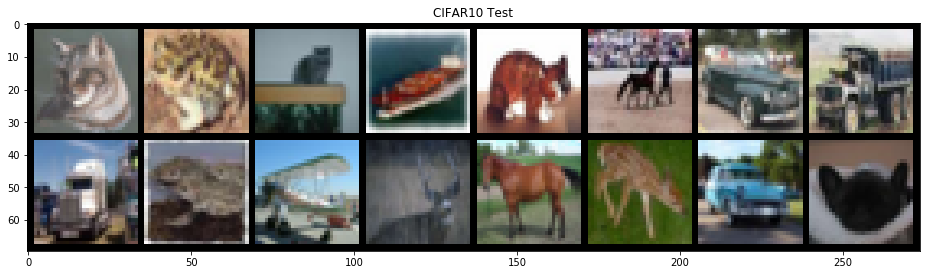

cat, frog, cat, ship, cat, horse, car, truck
truck, frog, plane, deer, horse, deer, car, cat


In [10]:
images, labels = next(iter(dataloader_cifar_train))
plt.figure(figsize=[16,8])
imshow(images[:16], mean=mean_cifar, std=std_cifar, title='CIFAR10 Train')
plt.show()
print(*classes[labels[:8].numpy()], sep=', ')
print(*classes[labels[8:16].numpy()], sep=', ')

images, labels = next(iter(dataloader_cifar_test))
plt.figure(figsize=[16,8])
imshow(images[:16], mean=mean_cifar, std=std_cifar, title='CIFAR10 Test')
plt.show()
print(*classes[labels[:8].numpy()], sep=', ')
print(*classes[labels[8:16].numpy()], sep=', ')

## SVHM

- The street view house numbers dataset
- Input: 3 X 32 X 32 image
- Output: 10 classes. Digit '1' has label 1, '9' has label 9 and '0' has label 0 (Original paper uses 10)
- \# of train samples = 73,257
- \# of test samples = 26,032
- The dataset splits into 3 parts, ‘train’, ‘test’ and ‘extra’. We don't use the 'extra' samples (less difficult)

http://ufldl.stanford.edu/housenumbers/

In [11]:
svhm_train = tv.datasets.SVHN(
    root,
    split='train',
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor()]),
    download=True)
dataloader_svhm_train = DataLoader(
    svhm_train,
    batch_size,
    shuffle=True,
    num_workers=num_workers)
mean_svhm, std_svhm = get_mean_std(dataloader_cifar_train, c=3)
print(mean_svhm, std_svhm)

svhm_test = tv.datasets.SVHN(
    root,
    split='test',
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor()]),
    download=True)
dataloader_svhm_test = DataLoader(
    svhm_test,
    batch_size,
    shuffle=True,
    num_workers=num_workers)

n_train = len(dataloader_svhm_train.dataset)
n_test = len(dataloader_svhm_test.dataset)
print(f'Train = {n_train}, Test = {n_test}')

Using downloaded and verified file: ./dataset_root/train_32x32.mat
# of samples in dataloader 60000.0
[-1.0338624e-07 -1.0338624e-07 -1.0338624e-07] [1.0000002 1.0000002 1.0000002]
Using downloaded and verified file: ./dataset_root/test_32x32.mat
Train = 73257, Test = 26032


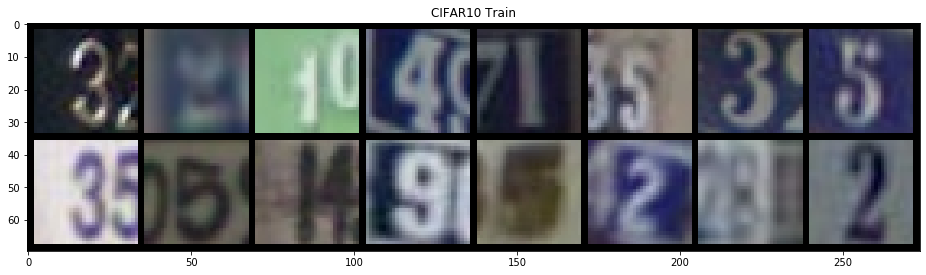

3, 2, 1, 4, 1, 5, 3, 5
3, 5, 1, 9, 5, 2, 8, 2


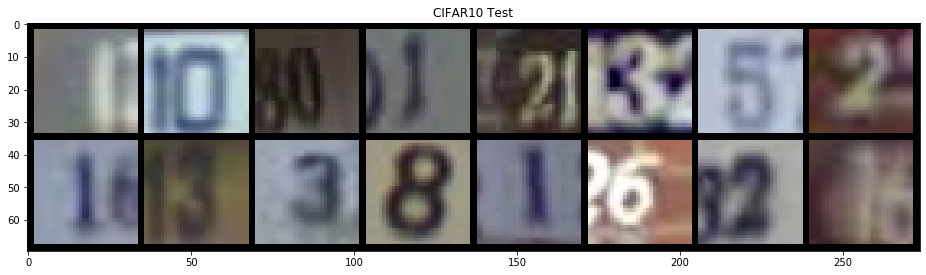

1, 0, 0, 1, 2, 3, 5, 2
1, 3, 3, 8, 1, 6, 2, 1


In [12]:
images, labels = next(iter(dataloader_svhm_train))
plt.figure(figsize=[16,8])
imshow(images[:16], mean=mean_cifar, std=std_cifar, title='CIFAR10 Train')
plt.show()
print(*labels[:8].numpy(), sep=', ')
print(*labels[8:16].numpy(), sep=', ')

images, labels = next(iter(dataloader_svhm_test))
plt.figure(figsize=[16,8])
imshow(images[:16], mean=mean_cifar, std=std_cifar, title='CIFAR10 Test')
plt.show()
print(*labels[:8].numpy(), sep=', ')
print(*labels[8:16].numpy(), sep=', ')